<p><strong>Дополнительное задание</strong></p>
<p>Выполнил <strong>Цветков Сергей</strong></p>
<p>В данном Датасете приведены сведения об абитуриентах, зачисленных на обучение в ВУЗ 1.</p>
<ol>
<li>Оцените представленный Датасет, разберитесь со смыслом представленных данных</li>
<li>Очистите данные от незаполненных записей</li>
<li>Проведите разведочный анализ данных</li>
<li>Определите наиболее значимые факторы, определяющие поступление абитуриентов на факультет</li>
<li>Постройте графики и диаграммы, характеризующие данные</li>
</ol>


In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [23]:
# Загружаем данные
# df = pd.read_csv('Statistika PRK.csv', sep=';')
data = pd.read_excel('Statistika PRK.xlsx', index_col = 'Идентификатор конкурса') # Установка индекса

In [24]:
# Оцениваем датасет
data.shape
print('Датасет состоит из {} строк и {} столбцов'.format(data.shape[0], data.shape[1]))

Датасет состоит из 16551 строк и 26 столбцов


In [25]:
data.head()

,Пол,Дата рождения,Гражданство,Регион,Тип населенного пункта,Тип документа об образовании,Изучаемый язык,Статус,Направление,Форма,...,Предмет 2,Баллы предмета 2,Тип предмета 2,Предмет 3,Баллы предмета 3,Тип предмета 3,Предмет 4,Баллы предмета 4,Тип предмета 4,Индивидуальные достижения
Идентификатор конкурса,,,,,,,,,,,,,,,,,,,,,
1,М,2001-05-24 00:00:00,Российская Федерация,Ростовская область,Город,Аттестат,Английский язык,Принято,Управление качеством,Заочная,...,Русский язык,85.0,ЕГЭ,Физика,48.0,ЕГЭ,NaN,NaN,NaN,NaN
2,М,2001-05-24 00:00:00,Российская Федерация,Ростовская область,Город,Аттестат,Английский язык,Зачислен,Управление качеством,Заочная,...,Русский язык,85.0,ЕГЭ,Физика,48.0,ЕГЭ,NaN,NaN,NaN,NaN
3,М,1988-09-16 00:00:00,Российская Федерация,Ростовская область,Город,Диплом специалиста,Английский язык,Зачислен,Торговое дело,Заочная,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,М,1988-09-16 00:00:00,Российская Федерация,Ростовская область,Город,Диплом специалиста,Английский язык,Принято,Торговое дело,Заочная,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ж,1993-09-08 00:00:00,Российская Федерация,Ростовская область,Город федерального значения,Диплом специалиста,Английский язык,Зачислен,Юриспруденция,Заочная,...,Русский язык,52.0,Экзамены ВУЗа,История,75.0,Экзамены ВУЗа,NaN,NaN,NaN,NaN


In [26]:
All_group = data.groupby('Пол') # Груперовка по полю sex (пол)
Male = All_group.get_group('М') # Обращаемся к конкретной группе 
Female = All_group.get_group('Ж') # Обращаемся к конкретной группе 
# Выводим на печать количество мужчин и женщин
print ("Количество мужчин:", len(Male)) 
print ("Количество женщин:", len(Female))

Количество мужчин: 5808
Количество женщин: 10743


In [27]:
# data.info()

In [28]:
# В датасете присутствуют нулевые объекты - оставляем только ненулевые
# data = data.dropna()

In [29]:
# Распределение подавших документы по типу населенного пункта
p_style = data.groupby('Тип населенного пункта')
u_p_style = data['Тип населенного пункта'].unique()
for one_style in u_p_style:    
    o = data[(data['Тип населенного пункта'] == one_style) & (data['Пол'] == 'М')]['Пол'].count()    
    print(one_style, o)

Город 4173
Город федерального значения 36
Населенный пункт сельского типа 1443
Населенный пункт городского типа 156


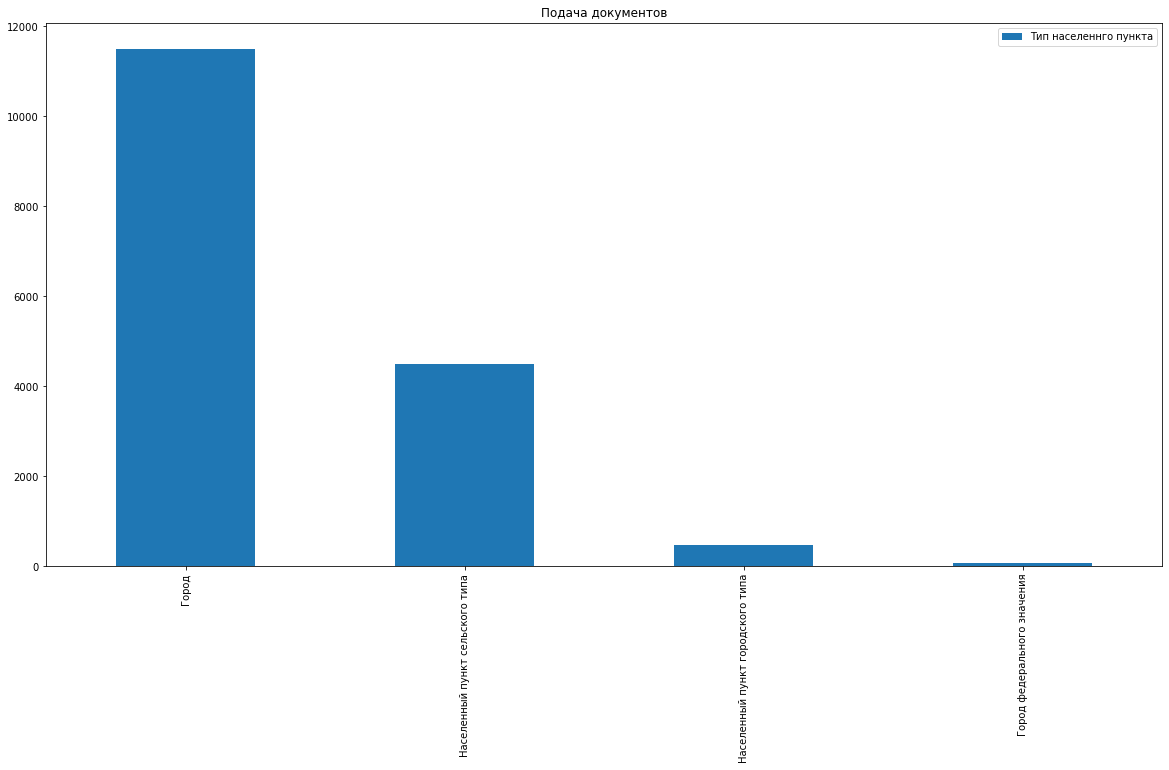

In [30]:
# Выводим распределение ро типу населенного пункта
data['Тип населенного пункта'].value_counts().plot(kind='bar', label='Тип населеннго пункта', rot=90) # rot=0 - поворот подписи данных
plt.legend()
plt.title('Подача документов');

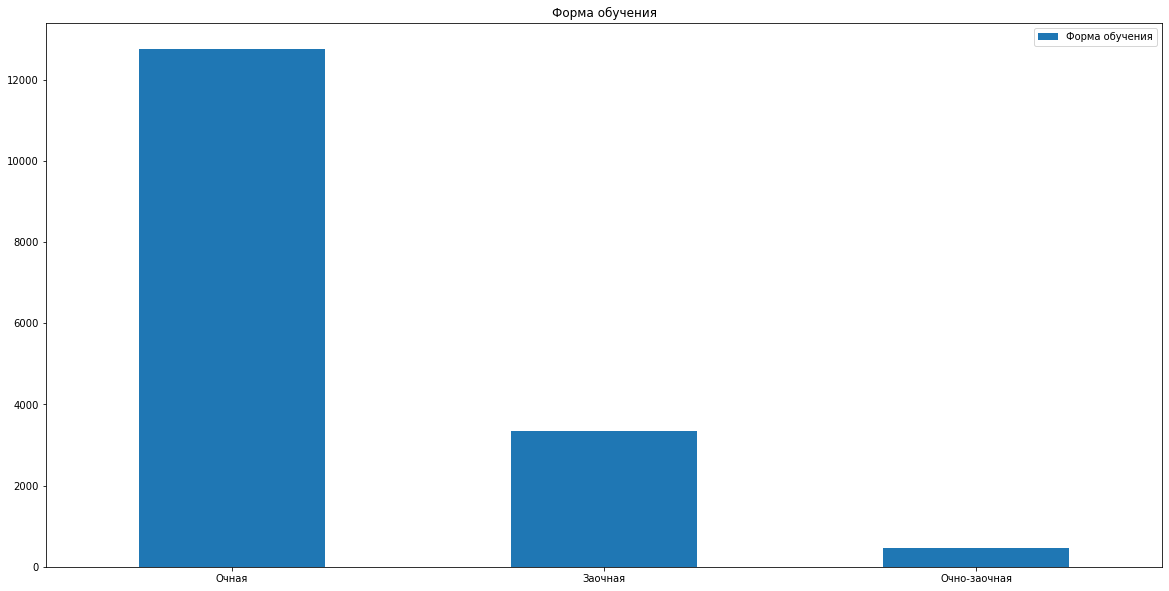

In [31]:
# Выводим распределение по типу Форма обучения
data['Форма'].value_counts().plot(kind='bar', label='Форма обучения', rot=0) # rot=0 - поворот подписи данных
plt.legend()
plt.title('Форма обучения');

In [32]:
# Группировка по полю Регион
reg_stat = data.groupby('Регион')
# Получаем уникальные значения по полю Регион - необходимо для перебора
u_reg = data['Регион'].unique()
for one_reg in u_reg:
    ab_male = data[(data['Регион'] == one_reg) & (data['Пол'] == 'М')]['Пол'].count()
    ab_fmale = data[(data['Регион'] == one_reg) & (data['Пол'] == 'Ж')]['Пол'].count()
#     print(one_reg, 'Мужчин: {}, Женщин: {}'.format(ab_male, ab_fmale))
    if (ab_male + ab_fmale) > 30:
        print(one_reg, '\tМужчины: {}, Женщины: {}, Итого: {}'.format(ab_male, ab_fmale, ab_male + ab_fmale))

Ростовская область 	Мужчины: 3766, Женщины: 6717, Итого: 10483
Республика Северная Осетия-Алания 	Мужчины: 29, Женщины: 70, Итого: 99
Краснодарский край 	Мужчины: 828, Женщины: 1947, Итого: 2775
Волгоградская область 	Мужчины: 24, Женщины: 87, Итого: 111
Чеченская Республика 	Мужчины: 133, Женщины: 40, Итого: 173
Кабардино-Балкарская Республика 	Мужчины: 73, Женщины: 107, Итого: 180
Ставропольский край 	Мужчины: 202, Женщины: 478, Итого: 680
За пределами РФ 	Мужчины: 111, Женщины: 236, Итого: 347
Республика Ингушетия 	Мужчины: 55, Женщины: 60, Итого: 115
Республика Адыгея (Адыгея) 	Мужчины: 68, Женщины: 110, Итого: 178
Республика Крым 	Мужчины: 76, Женщины: 138, Итого: 214
Республика Калмыкия 	Мужчины: 67, Женщины: 140, Итого: 207
Республика Дагестан 	Мужчины: 95, Женщины: 62, Итого: 157
Ямало-Ненецкий автономный округ 	Мужчины: 15, Женщины: 16, Итого: 31
Красноярский край 	Мужчины: 21, Женщины: 21, Итого: 42
Карачаево-Черкесская Республика 	Мужчины: 19, Женщины: 62, Итого: 81
Московск

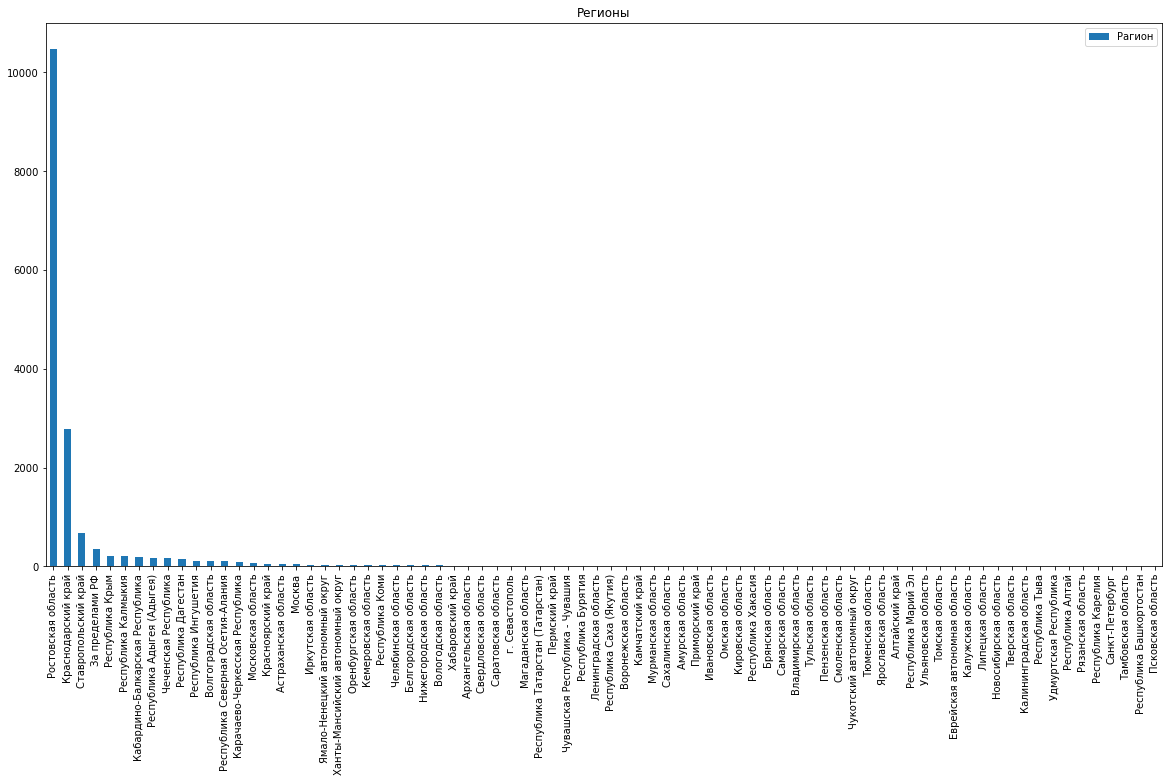

In [33]:
# Распределение по регионам
data['Регион'].value_counts().plot(kind='bar', label='Рагион', rot=90) # rot=0 - поворот подписи данных
plt.legend()
plt.title('Регионы');

In [35]:
# Группировка по полю Направление
form_stat = data.groupby('Направление')
# Получаем уникальные значения по полю Направление - необходимо для перебора
u_form = data['Направление'].unique()
for one_form in u_form:
    zachslen = data[(data['Направление'] == one_form) & (data['Статус'] == 'Зачислен')]['Пол'].count() # Зачислены
    all_std = data[data['Направление'] == one_form]['Пол'].count() # Все
    itog = (zachslen/all_std)*100
    print(round(itog, 2), '%\t', '\t', one_form)


31.18 %	 	 Управление качеством
17.15 %	 	 Торговое дело
32.16 %	 	 Юриспруденция
9.32 %	 	 Сервис
38.3 %	 	 Журналистика
7.28 %	 	 Организация работы с молодежью
8.25 %	 	 Менеджмент
13.86 %	 	 Реклама и связи с общественностью
32.43 %	 	 Экономика
34.03 %	 	 Экономическая безопасность
40.3 %	 	 Управление персоналом
18.11 %	 	 Лингвистика
6.04 %	 	 Информационные системы и технологии
9.44 %	 	 Информационная безопасность
12.01 %	 	 Прикладная информатика
13.23 %	 	 Программная инженерия
25.0 %	 	 Фундаментальная информатика и информационные технологии
13.51 %	 	 Прикладная математика и информатика
45.83 %	 	 Финансы и кредит
19.74 %	 	 Судебная экспертиза
29.84 %	 	 Государственное и муниципальное управление
19.39 %	 	 Международные отношения
18.44 %	 	 Таможенное дело
55.0 %	 	 Товароведение
36.93 %	 	 Зарубежное регионоведение
83.33 %	 	 Уголовное право и криминология; уголовно-исполнительное право
15.25 %	 	 Бизнес-информатика
0.0 %	 	 Общая педагогика, история педагогики и образо

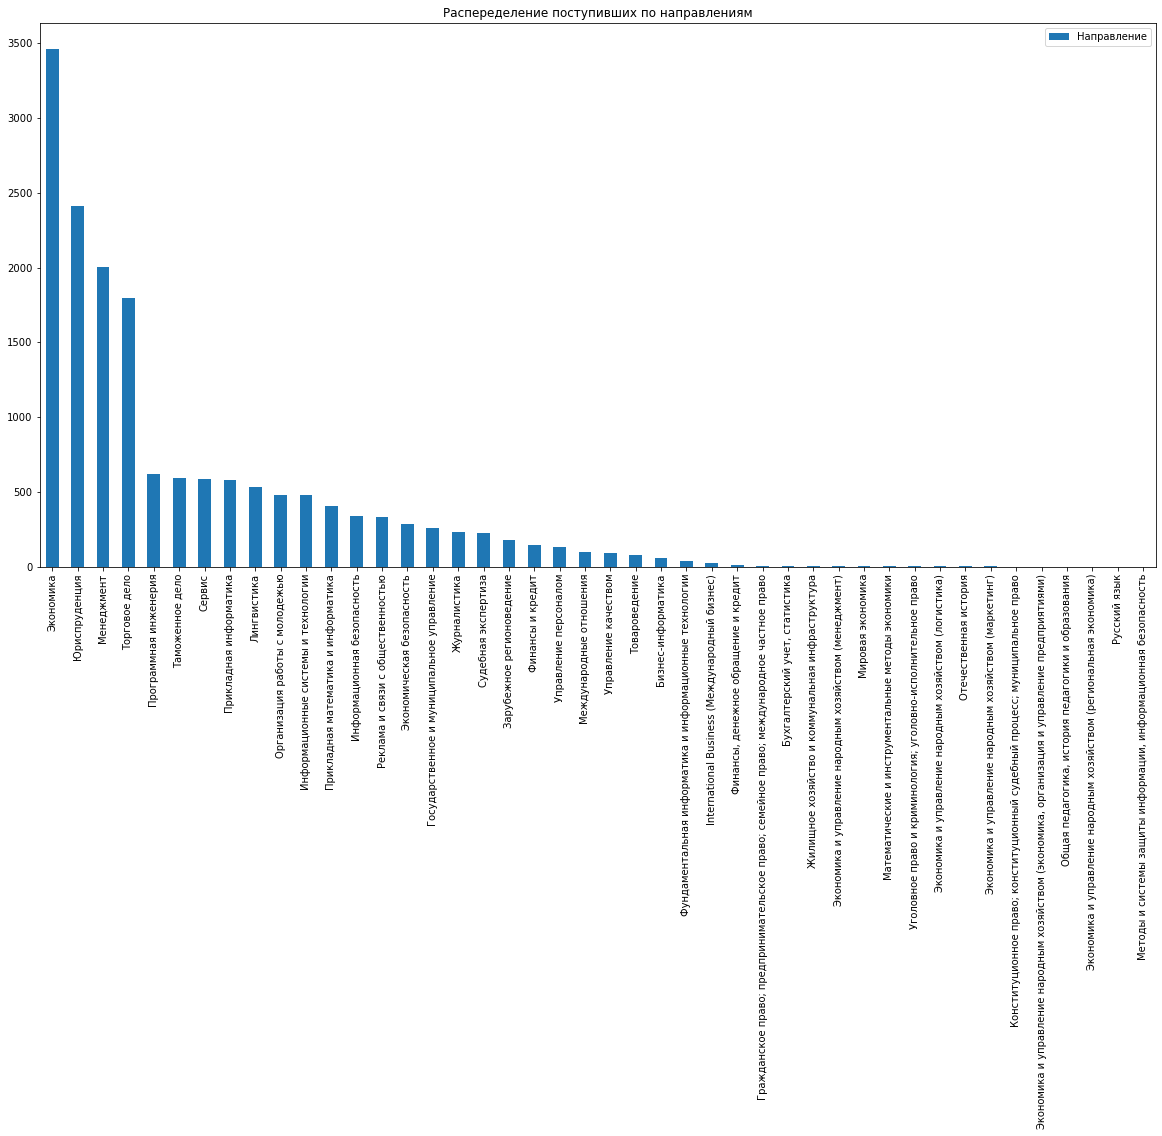

In [37]:
# Распределение по Направлениям
data['Направление'].value_counts().plot(kind='bar', label='Направление', rot=90) # rot=0 - поворот подписи данных
plt.legend()
plt.title('Распределение поступивших по направлениям');

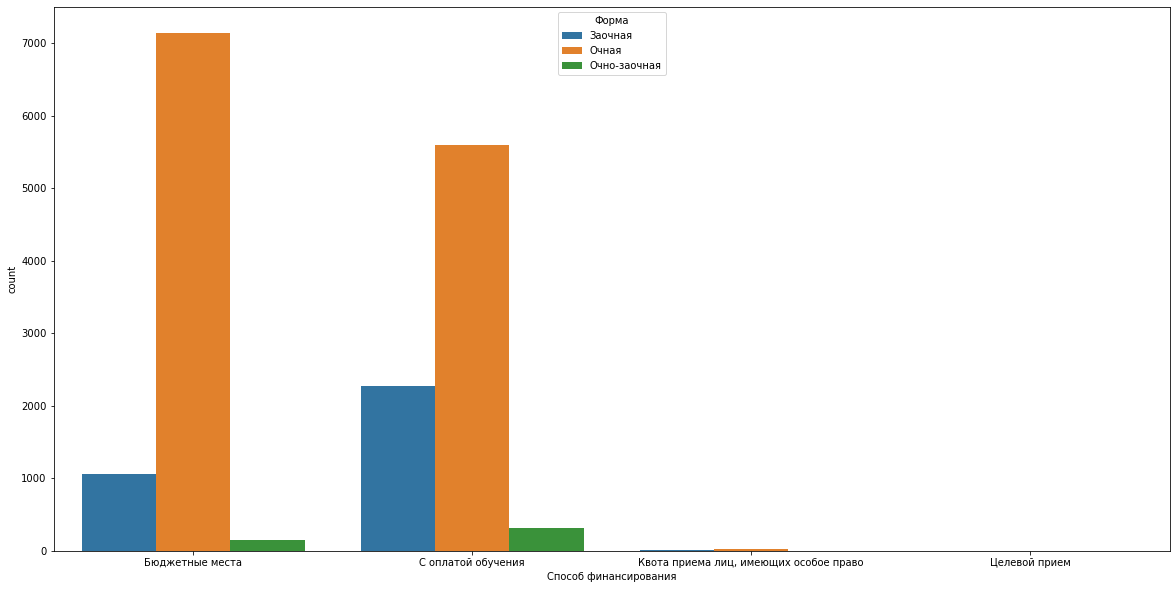

In [46]:
# Способ финансирования по формам обучения
sns.countplot(x='Способ финансирования', hue='Форма', data=data);

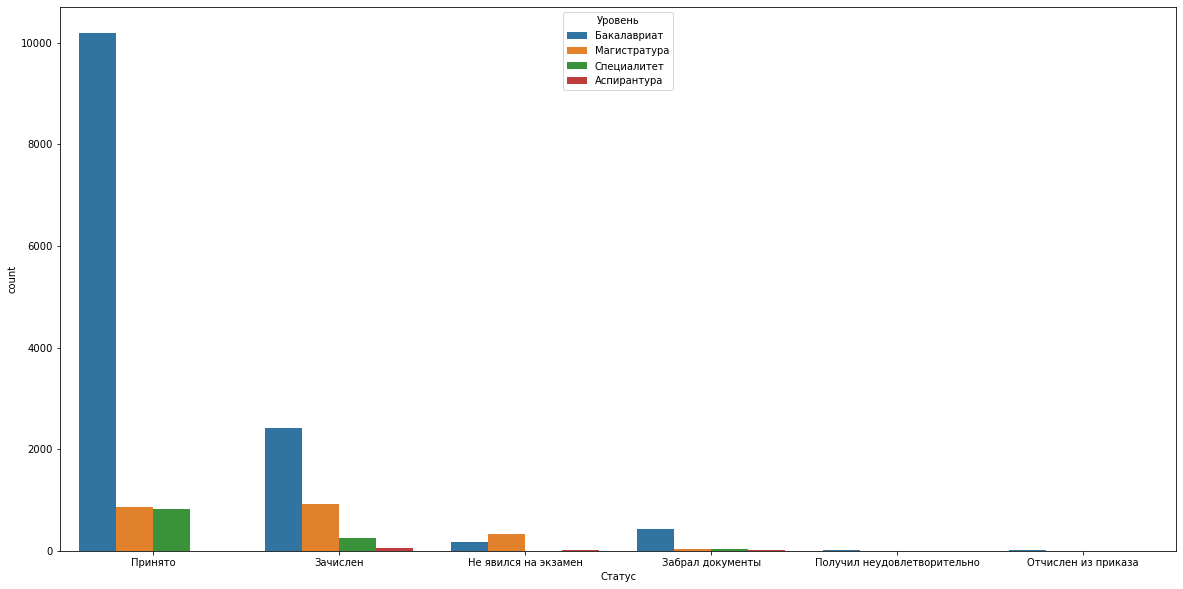

In [51]:
# Статус по уровням
sns.countplot(x='Статус', hue='Уровень', data=data);

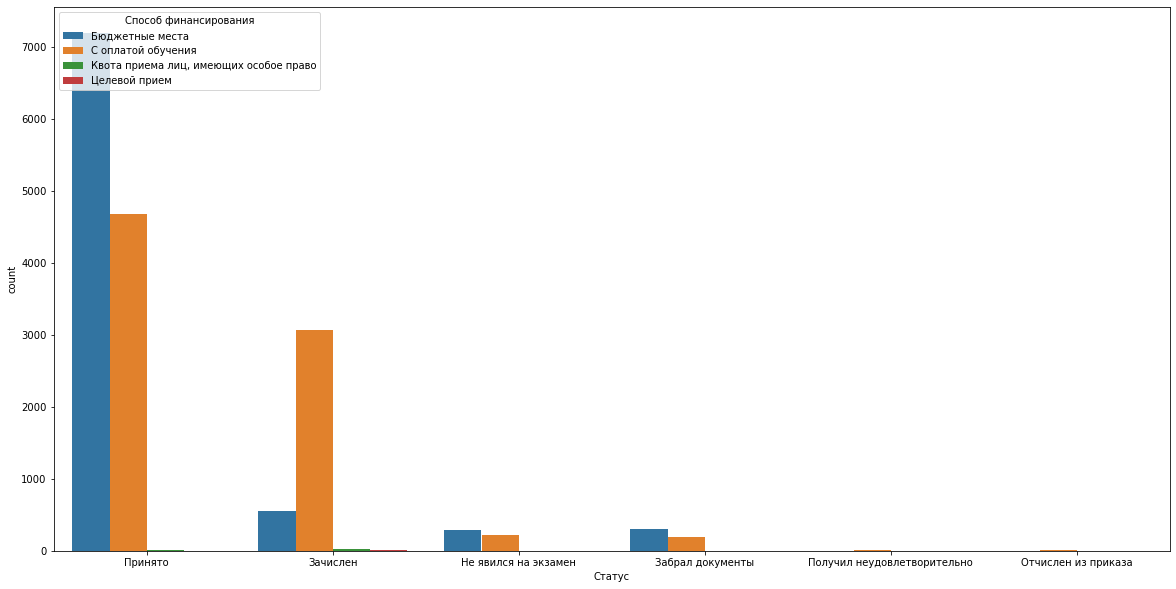

In [55]:
# Способ финансирования по статусам
sns.countplot(x='Статус', hue='Способ финансирования', data=data);